In [72]:
#Import Libraries
import pandas as pd
import missingno as msn
import seaborn as sns

In [5]:
#Read data file obtained from datos.gov

#Select the columns that we want to parse as dates.
date_cols = [ 'Ultima Actualizacion','Fecha Inicio Liquidacion', 'Codigo Proveedor','Fecha de Firma', 'Fecha de Inicio del Contrato',
              'Fecha de Inicio de Ejecucion','Fecha de Fin de Ejecucion']

df = pd.read_csv('../data/SECOP_II_-_Contratos_Electr_nicos.csv', parse_dates=date_cols, low_memory=False)
print('The shape of the original dataset is : ' + str(df.shape))

The shape of the original dataset is : (1711833, 71)


In [ ]:
#Check for missing values within the dataset
msn.bar(df.sample(300000))

In [74]:
#Select Columns to delete.

delete_list = [ 'Nit Entidad', 'Proceso de Compra', 
                'Localización','Ciudad','ID Contrato','Referencia del Contrato','Codigo de Categoria Principal'
                ,'Descripcion del Proceso', 'Fecha de Firma','Justificacion Modalidad de Contratacion',
                #'Fecha de Inicio de Ejecucion','Fecha de Fin de Ejecucion',
                'Condiciones de Entrega',
                'TipoDocProveedor', 'Documento Proveedor','Proveedor Adjudicado',
                'Habilita Pago Adelantado','Liquidación','Reversion','Estado BPIN','Código BPIN','Anno BPIN', 'Saldo CDP', 'Saldo Vigencia',
                'URLProceso','Puntos del Acuerdo','Pilares del Acuerdo','Nombre Representante Legal',
                'Nacionalidad Representante Legal','Tipo de Identificación Representante Legal','Género Representante Legal',
                'Ultima Actualizacion','Codigo Entidad','Fecha Inicio Liquidacion','Fecha Fin Liquidacion',
                'Codigo Proveedor','Objeto del Contrato','Identificación Representante Legal']

#Dataset cleaned version 1
df_cleanv1 = df.drop(delete_list, axis=1)

In [75]:
df_cleanv1.shape

(1711833, 36)

In [76]:
#Normalizing 'Departamento' column
dic = {'Distrito Capital de Bogotá':'Bogotá, D.C.', 'Quindío':'Quindio',
       'San Andrés, Providencia y Santa Catalina':'Archipiélago De San Andrés, Providencia Y Santa Catalina'}

df_cleanv1['Departamento'] = df_cleanv1.Departamento.replace(dic)


In [71]:
df_cleanv1[(df_cleanv1["Departamento"] == "No Definido") & (df_cleanv1["Dias Adicionados"] == 0)].shape

(8675, 35)

In [82]:
#Dataset cleaned version 2
#df_cleanv2 = df_cleanv1[df_cleanv1['Departamento']!="No Definido"]
df_cleanv2 = df_cleanv1[(df_cleanv1["Departamento"] != "No Definido") | (df_cleanv1["Dias Adicionados"] != 0)]

In [89]:
df_cleanv2[df_cleanv2["Dias Adicionados"] > 0].shape

(231621, 36)

In [92]:
df_cleanv2[(df_cleanv2["EsPostConflicto"] == "ND") & (df_cleanv2["Dias Adicionados"] == 0)].shape

(1675, 36)

In [91]:
#Cleaning missing or undefined values in columns
#df_cleanv3 = df_cleanv2[df_cleanv2['EsPostConflicto']!='ND']
df_cleanv3 = df_cleanv2[(df_cleanv2['EsPostConflicto']!='ND') | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv3.shape

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\1798727064.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv3 = df_cleanv2[(df_cleanv2['EsPostConflicto']!='ND') | (df_cleanv1["Dias Adicionados"] != 0)]


(1701483, 36)

In [93]:
#df_cleanv4 = df_cleanv3[df_cleanv3['Orden']!='No Definido']
df_cleanv4 = df_cleanv3[(df_cleanv3['Orden']!='No Definido') | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv4.shape

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\2776378509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv4 = df_cleanv3[(df_cleanv3['Orden']!='No Definido') | (df_cleanv1["Dias Adicionados"] != 0)]


(1701480, 36)

In [97]:
#No elimina datos
#df_cleanv5 = df_cleanv4[df_cleanv4['Sector']!='No Definido']
df_cleanv5 = df_cleanv4[(df_cleanv4['Sector']!='No Definido')]# | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv5.shape

(1701480, 36)

In [99]:
#No elimina datos
#df_cleanv6 = df_cleanv5[df_cleanv5['Rama']!='No Definido']
df_cleanv6 = df_cleanv5[(df_cleanv5['Rama']!='No Definido') | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv6.shape

(1701480, 36)

In [101]:
#df_cleanv7 = df_cleanv6[df_cleanv6['Tipo de Contrato']!='No Especificado']
df_cleanv7 = df_cleanv6[(df_cleanv6['Tipo de Contrato']!='No Especificado') | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv7.shape

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\453259235.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv7 = df_cleanv6[(df_cleanv6['Tipo de Contrato']!='No Especificado') | (df_cleanv1["Dias Adicionados"] != 0)]


(1699729, 36)

In [102]:
#No elimina datos
#df_cleanv8 = df_cleanv7[df_cleanv7['Modalidad de Contratacion']!="Concurso de méritos con precalificación"]
df_cleanv8 = df_cleanv7[(df_cleanv7['Modalidad de Contratacion']!="Concurso de méritos con precalificación") | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv8.shape
#Dataset cleaned version 8

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\2767979334.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv8 = df_cleanv7[(df_cleanv7['Modalidad de Contratacion']!="Concurso de méritos con precalificación") | (df_cleanv1["Dias Adicionados"] != 0)]


(1699729, 36)

In [103]:
#Normalizing 'Modalidad de Contratacion' column
dic = {'Enajenación de bienes con sobre cerrado':'Enajenación de bienes', 
        'Enajenación de bienes con subasta':'Enajenación de bienes'}

df_cleanv8['Modalidad de Contratacion'] = df_cleanv8['Modalidad de Contratacion'].replace(dic)

In [106]:
df_cleanv8[(df_cleanv8['Fecha de Inicio del Contrato'].isna()==False) | (df_cleanv1["Dias Adicionados"] != 0)].shape

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\2213612808.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv8[(df_cleanv8['Fecha de Inicio del Contrato'].isna()==False) | (df_cleanv1["Dias Adicionados"] != 0)].shape


(1583882, 36)

In [108]:
df_cleanv9[(df_cleanv9['Fecha de Fin del Contrato'].isna()==False) | (df_cleanv1["Dias Adicionados"] != 0)].shape

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\1898027260.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv9[(df_cleanv9['Fecha de Fin del Contrato'].isna()==False) | (df_cleanv1["Dias Adicionados"] != 0)].shape


(1583874, 36)

In [104]:
# Cleaning Nulls in date columns
df_cleanv9 = df_cleanv8[df_cleanv8['Fecha de Inicio del Contrato'].isna()==False]
df_cleanv10 = df_cleanv9[df_cleanv9['Fecha de Fin del Contrato'].isna()==False]
#Dataset cleaned version 10

In [105]:
df_cleanv10.shape

(1583874, 36)

In [111]:
df_cleanv10[df_cleanv10['Fecha de Inicio del Contrato'].dt.year <= 2019].shape

(332684, 36)

In [113]:
df_cleanv10[(df_cleanv10['Fecha de Inicio del Contrato'].dt.year <= 2019) & (df_cleanv1["Dias Adicionados"] != 0)].shape

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\1863136191.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleanv10[(df_cleanv10['Fecha de Inicio del Contrato'].dt.year <= 2019) & (df_cleanv1["Dias Adicionados"] != 0)].shape


(22470, 36)

In [120]:
df_cleanv10.sort_values(by="Fecha de Fin del Contrato")["Fecha de Fin del Contrato"].head()

1679890    01/01/2017
320671     01/01/2017
1280653    01/01/2017
956735     01/01/2017
1705876    01/01/2017
Name: Fecha de Fin del Contrato, dtype: object

In [121]:
df_cleanv10["Fecha de Fin del Contrato"] = pd.to_datetime(df_cleanv10["Fecha de Fin del Contrato"], errors = 'coerce')

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\489955390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanv10["Fecha de Fin del Contrato"] = pd.to_datetime(df_cleanv10["Fecha de Fin del Contrato"], errors = 'coerce')


In [123]:
df_cleanv11 = df_cleanv10

In [124]:
# No se eliminan registros anteriores a 2020
# Select only records since 2020
#df_cleanv11 = df_cleanv10[df_cleanv10['Fecha de Inicio del Contrato'].dt.year > 2019]
df_cleanv11['Fecha de Fin del Contrato'] = df_cleanv11['Fecha de Fin del Contrato'].astype('datetime64[ns]')
#Dataset cleaned version 11

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\726040445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanv11['Fecha de Fin del Contrato'] = df_cleanv11['Fecha de Fin del Contrato'].astype('datetime64[ns]')


In [125]:
#Create new column Origen de los Recursos as multiple binary columns. 

variables_a_crear = ['PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']
variables_reales = ['Presupuesto General de la Nacion – PGN','Sistema General de Participaciones',
                     'Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
                     'Recursos Propios','Recursos de Credito']
                     
for i,j in zip(variables_a_crear,variables_reales):
    df_cleanv11[i] = (df_cleanv11[j] > 0).astype(int)

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\2997640777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanv11[i] = (df_cleanv11[j] > 0).astype(int)
C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\2997640777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanv11[i] = (df_cleanv11[j] > 0).astype(int)
C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\2997640777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [126]:
delete_list = [ 'Presupuesto General de la Nacion – PGN','Sistema General de Participaciones',
                'Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
                'Recursos Propios','Recursos de Credito', 'Origen de los Recursos']

#Dataset cleaned version 1
df_cleanv11 = df_cleanv11.drop(delete_list, axis=1)

In [127]:
df_cleanv11.shape

(1583874, 35)

In [130]:
boolean_mask = (df_cleanv11.loc[:,['PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']].sum(axis=1)) > 0
#df_cleanv12 = df_cleanv11[ boolean_mask ]
df_cleanv12 = df_cleanv11

In [131]:
df_cleanv12.shape

(1583874, 35)

In [132]:
print(df_cleanv12.columns)

Index(['Nombre Entidad', 'Departamento', 'Orden', 'Sector', 'Rama',
       'Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Es Grupo', 'Es Pyme',
       'Obligación Ambiental', 'Obligaciones Postconsumo',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'EsPostConflicto', 'Destino Gasto', 'Dias Adicionados', 'Delay', 'PGN',
       'SGP', 'SGR', 'RP_AGR', 'RP_NO_AGR', 'RC'],
      dtype='object')


In [133]:
#Construct dependent variable Y 
def feature_engineer(days_added, date_init, date_finish):
    
    contract_duration = abs(date_init - date_finish).days
    
    if contract_duration == 0:
        Normalized_Delay = 1 
    else:
        Normalized_Delay = days_added/contract_duration
    
    if Normalized_Delay == 0:
        delay = 0
    elif Normalized_Delay > 0 and Normalized_Delay < 0.2:
        delay = 1
    elif Normalized_Delay >= 0.2 and Normalized_Delay < 0.7:
        delay = 2
    elif Normalized_Delay >= 0.7: 
        delay = 3
            
    return delay

In [141]:
df_cleanv12 = df_cleanv12[df_cleanv12['Fecha de Fin del Contrato'].isna() != True]

In [142]:
df['Delay'] = df_cleanv12.apply(lambda x: feature_engineer(x['Dias Adicionados'],
                                                  x['Fecha de Inicio del Contrato'],
                                                  x['Fecha de Fin del Contrato']), axis=1)

In [143]:
print('The shape of the cleaned dataset is : ' + str(df_cleanv12.shape))

The shape of the cleaned dataset is : (1583873, 35)


In [144]:
# Export the cleaned dataset to a csv file
df_cleanv12.to_csv('../data/SECOP_Electronicos_Cleaned.csv')

<AxesSubplot:>

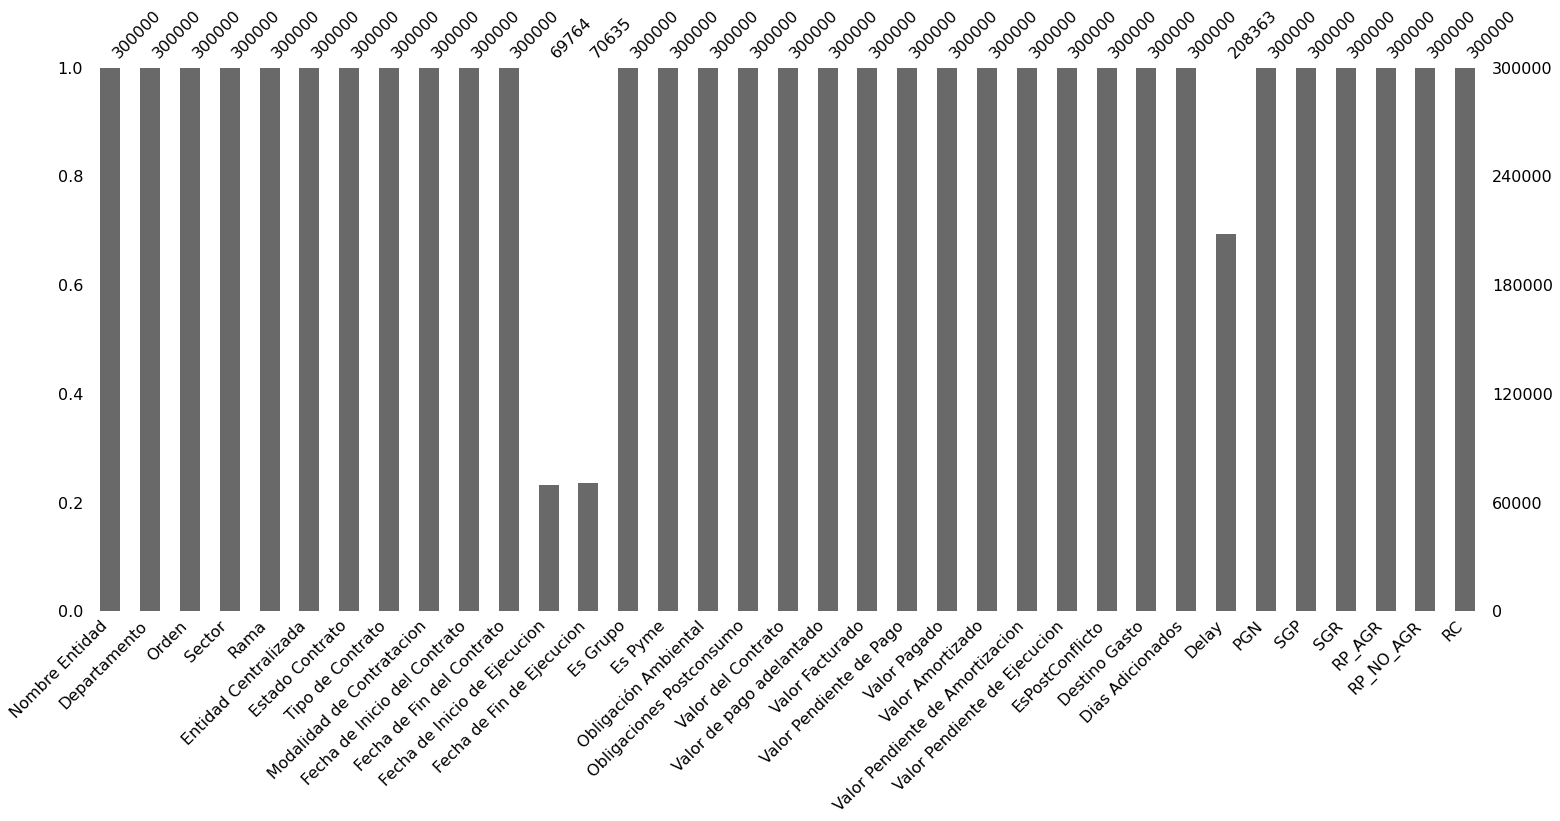

In [145]:
# NA analysis of cleaned dataset
msn.bar(df_cleanv12.sample(300000))

In [146]:
df_cleanedv13 = df_cleanv12[df_cleanv12["Fecha de Inicio del Contrato"] == df_cleanv12["Fecha de Fin del Contrato"]]

In [148]:
cols = ["Fecha de Inicio del Contrato", "Fecha de Fin del Contrato", "Dias Adicionados", 
        "Fecha de Inicio de Ejecucion", "Fecha de Fin de Ejecucion"]
df_cleanedv13[df_cleanedv13["Dias Adicionados"] > 0][cols].shape

(111, 5)

In [156]:
df_cleanv14 = df_cleanv12[(df_cleanv12["Fecha de Inicio de Ejecucion"].isna() == False) | (df_cleanv12["Fecha de Fin de Ejecucion"].isna() == False)]

In [150]:
df_cleanv12.shape

(1583873, 35)

In [151]:
df_cleanv12[df_cleanv12["Dias Adicionados"] > 0].shape

(231621, 35)

In [157]:
df_cleanv14[cols]

,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Dias Adicionados,Fecha de Inicio de Ejecucion,Fecha de Fin de Ejecucion
1,2020-03-17,2020-12-17,0,2020-03-17,12/17/2020
3,2018-09-04,2018-12-20,0,2018-09-04,12/20/2018
9,2019-02-01,2019-12-31,0,2019-02-01,12/31/2019
11,2020-01-20,2020-02-19,0,2020-01-20,02/19/2020
13,2019-01-15,2019-12-30,0,2019-01-15,12/30/2019
...,...,...,...,...,...
1711790,2019-02-01,2019-04-30,0,2019-02-01,04/30/2019
1711810,2020-01-10,2020-12-31,0,2020-01-10,12/31/2020
1711813,2020-02-12,2020-07-19,49,2020-02-12,07/19/2020
1711815,2018-06-01,2018-09-30,0,2018-06-01,06/30/2018


In [158]:
df_cleanv14['Fecha de Fin de Ejecucion'] = df_cleanv14['Fecha de Fin de Ejecucion'].astype('datetime64[ns]')

C:\Users\WveimarLópezMarin\AppData\Local\Temp\ipykernel_23296\1938899688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanv14['Fecha de Fin de Ejecucion'] = df_cleanv14['Fecha de Fin de Ejecucion'].astype('datetime64[ns]')


In [167]:
df_cleanv14[df_cleanv14["Fecha de Fin del Contrato"] != df_cleanv14["Fecha de Fin de Ejecucion"]][cols].shape

(60048, 5)